<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Задачи-проекта" data-toc-modified-id="Задачи-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи проекта</a></span></li><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Подключаемся-к-базе-данных" data-toc-modified-id="Подключаемся-к-базе-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подключаемся к базе данных</a></span></li><li><span><a href="#Проверка-и-изучение-данных" data-toc-modified-id="Проверка-и-изучение-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка и изучение данных</a></span></li><li><span><a href="#Выгрузка-таблицы" data-toc-modified-id="Выгрузка-таблицы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выгрузка таблицы</a></span></li><li><span><a href="#Дашборд" data-toc-modified-id="Дашборд-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Дашборд</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Презентация</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Дашборд для Яндекс.Дзен

# Ситуация

Вы работаете аналитиком в Яндекс.Дзене. Почти всё ваше время занимает анализ пользовательского взаимодействия с карточками статей.

Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия». А пользователей системы характеризует возрастная категория.

Есть три способа взаимодействия пользователей с системой:

* Карточка отображена для пользователя (show);
* Пользователь кликнул на карточку (click);
* Пользователь просмотрел статью карточки (view).

Каждую неделю начинающие менеджеры Денис и Валерия задают вам одни и те же вопросы:

* Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
* Как много карточек генерируют источники с разными темами?
* Как соотносятся темы карточек и темы источников?

На шестую неделю работы вы решаете, что процесс пора автоматизировать. Для Дениса и Валерии нужно сделать дашборд.

Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет разработан для вас дата-инженерами.

## Описание проекта

Пообщавшись с менеджерами и администраторами баз данных, было составлено краткое ТЗ для создания дашборда:

* Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
* Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
* Кто будет основным пользователем дашборда: менеджеры по анализу контента;

Состав данных для дашборда:

* История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
* Разбивка событий по темам источников;
* Таблица соответствия тем источников темам карточек;

По каким параметрам данные должны группироваться:

* Дата и время;
* Тема карточки;
* Тема источника;
* Возрастная группа;

Характер данных:
* История событий по темам карточек — абсолютные величины с разбивкой по минутам;
* Разбивка событий по темам источников — относительные величины (% событий);
* Соответствия тем источников темам карточек - абсолютные величины;
* Важность: все графики имеют равную важность;

Источники данных для дашборда: 
* Сырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);

База данных, в которой будут храниться агрегированные данные: 

* Дополнительные агрегированные таблицы в БД zen;

Частота обновления данных: 
* Один раз в сутки, в полночь по UTC;

Макет дашборда:

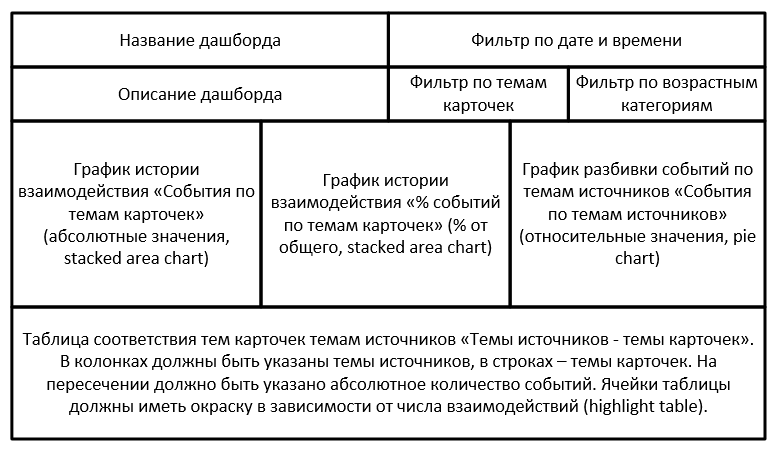

## Задачи проекта

Основные задачи проекта:

* Получить данные из базы данных

* Создать дашборд на основе полученных данных

* Ответить на вопросы менеджеров в виде презентации:
 * Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
 * Как много карточек генерируют источники с разными темами?
 * Как соотносятся темы карточек и темы источников?

## Загрузка библиотек

In [6]:
import pandas as pd
from sqlalchemy import create_engine
# !pip install psycopg2-binary 

## Подключаемся к базе данных

In [11]:
# задаем параметры подключения
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

# создаем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

# подключаемся к БД
engine = create_engine(connection_string) 

# формируем SQL запрос

query = ''' 
            SELECT *
            FROM dash_visits
        '''
# сохраняем результат запроса в DataFrame 
data = pd.io.sql.read_sql(query, con = engine)

# выведем результат
data

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


## Проверка и изучение данных

In [13]:
# посмотрим информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [15]:
# проверим на явные дубликаты
data.duplicated().sum()

0

In [22]:
# посмотрим какие темы карточек есть в таблице 
data['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [23]:
# посмотрим какие темы источников есть в таблице 
data['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [24]:
# посмотрим какие возрастные группы есть в таблице 
data['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [17]:
# посмотрим за какой период получены данные
print(data['dt'].min(), '-', data['dt'].max())

2019-09-24 18:28:00 - 2019-09-24 19:00:00


## Выгрузка таблицы

In [12]:
# сохраним таблицу в формате csv для последующей загрузки в Tableau
data.to_csv('dash_visits.csv')

## Дашборд

Готовый дашборд по ссылке:    [Перейти к дашборду](https://public.tableau.com/views/project_11_dzen_dashboard/sheet4?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Презентация

Ссылка на презентацию: [Посмотреть презентацию](https://disk.yandex.ru/i/WM9GNiz7byzYmw)

## Общие выводы

Полученные данные были хорошо подготовлены - дублей, пропусков и других ошибок мы не обнаружили.

Для построенния дашборда мы получили данные по посещениям карточек Яндекс.Дзена за период с 18:28:00 по 19:00:00, 24 сентября 2019 года.

Построив дашборд мы можем отметить следующие посещения карточек:

* На самый пик событий приходится суммарно 61.247 посещений.


* Топ-5 наиболее популярных тем карточек:
 - Наука (4.372 посещения)
 - Отношения (4.145 посещений)
 - Интересные факты (3.910 посещений)
 - Общество (3.723 посещений)
 - Подборки (3.520 посещений)
 
 
* Топ-5 наименее популярных тем карточек:
 - Знаменитости (1.463 посещения)
 - Шоу (1.485 посещений)
 - Женская психология (1.518 посещений)
 - Психология (1.538 посещений)
 - Искусство (1.707 посещений)
 
По темы источников генерируют следующие количества посещенений:
 
* Топ-5 наиболее популярных тем источников:
 - Семейные отношения (10-11% посещений)
 - Россия (9-10% посещений)
 - Полезные советы (8-9% посещений)
 - Путешествия (7-8% посещений)
 - Знаменитости (7-8% посещений)
 
 
* Топ-5 наименее популярных тем источников:
 - Финансы (0.8-1% посещений)
 - Музыка (0.8-1% посещений)
 - Строительство (0.8-1% посещений)
 - Технологии (1% посещений)
 - Интерьеры (1.24% посещений)
 
 
* Топ-5 наиболее популярных связок «источник - тема карточки»:
 - Путешествия - Рассказы (4.587 посещений)
 - Россия - Общество (3.471 посещение)
 - Кино - Наука (3.279 посещений)
 - Россия - Россия (2.847 посещений)
 - Полезные советы - Подборки (2.795 посещений)